<a href="https://colab.research.google.com/github/Aneesh-PB/Machine-Learning/blob/main/Data_Mining_Micro_project_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
# Importing Dataset
df=pd.read_csv('/content/drive/MyDrive/DM lab/Dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking for missing values
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
# Checking for duplicate instances
df[df.duplicated()==True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [6]:
# Checking number of rows and columns
df.shape

(284807, 31)

In [7]:
# Removing duplicate instances
df.drop_duplicates(inplace=True)

In [8]:
# Checking number of rows and columns after removing duplicates
df.shape

(283726, 31)

In [9]:
# Finding the range of different attributes
for i in df:
  print(min(df[i]),max(df[i]))

0.0 172792.0
-56.407509631329 2.45492999121121
-72.7157275629303 22.0577289904909
-48.3255893623954 9.38255843282114
-5.68317119816995 16.8753440335975
-113.743306711146 34.8016658766686
-26.1605059358433 73.3016255459646
-43.5572415712451 120.589493945238
-73.2167184552674 20.0072083651213
-13.4340663182301 15.5949946071278
-24.5882624372475 23.7451361206545
-4.79747346479757 12.0189131816199
-18.6837146333443 7.8483920756446
-5.79188120632084 7.12688295859376
-19.2143254902614 10.5267660517847
-4.49894467676621 8.87774159774277
-14.1298545174931 17.3151115176278
-25.1627993693248 9.25352625047285
-9.49874592104677 5.04106918541184
-7.21352743017759 5.59197142733558
-54.497720494566 39.4209042482199
-34.8303821448146 27.2028391573154
-10.933143697655 10.5030900899454
-44.8077352037913 22.5284116897749
-2.83662691870341 4.58454913689817
-10.2953970749851 7.51958867870916
-2.60455055280817 3.5173456116238
-22.5656793207827 31.6121981061363
-15.4300839055349 33.8478078188831
0.0 25691.16

In [10]:
# Displaying the dataframe
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [12]:
df['Class'].value_counts(normalize=True)*100

0    99.83329
1     0.16671
Name: Class, dtype: float64

In [13]:
# Removing the time attribute
df.drop(['Time'],axis=1,inplace=True)

array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>],
       [<Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>,
        <Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>],
       [<Axes: title={'center': 'V26'}>, <Axes: title={'cen

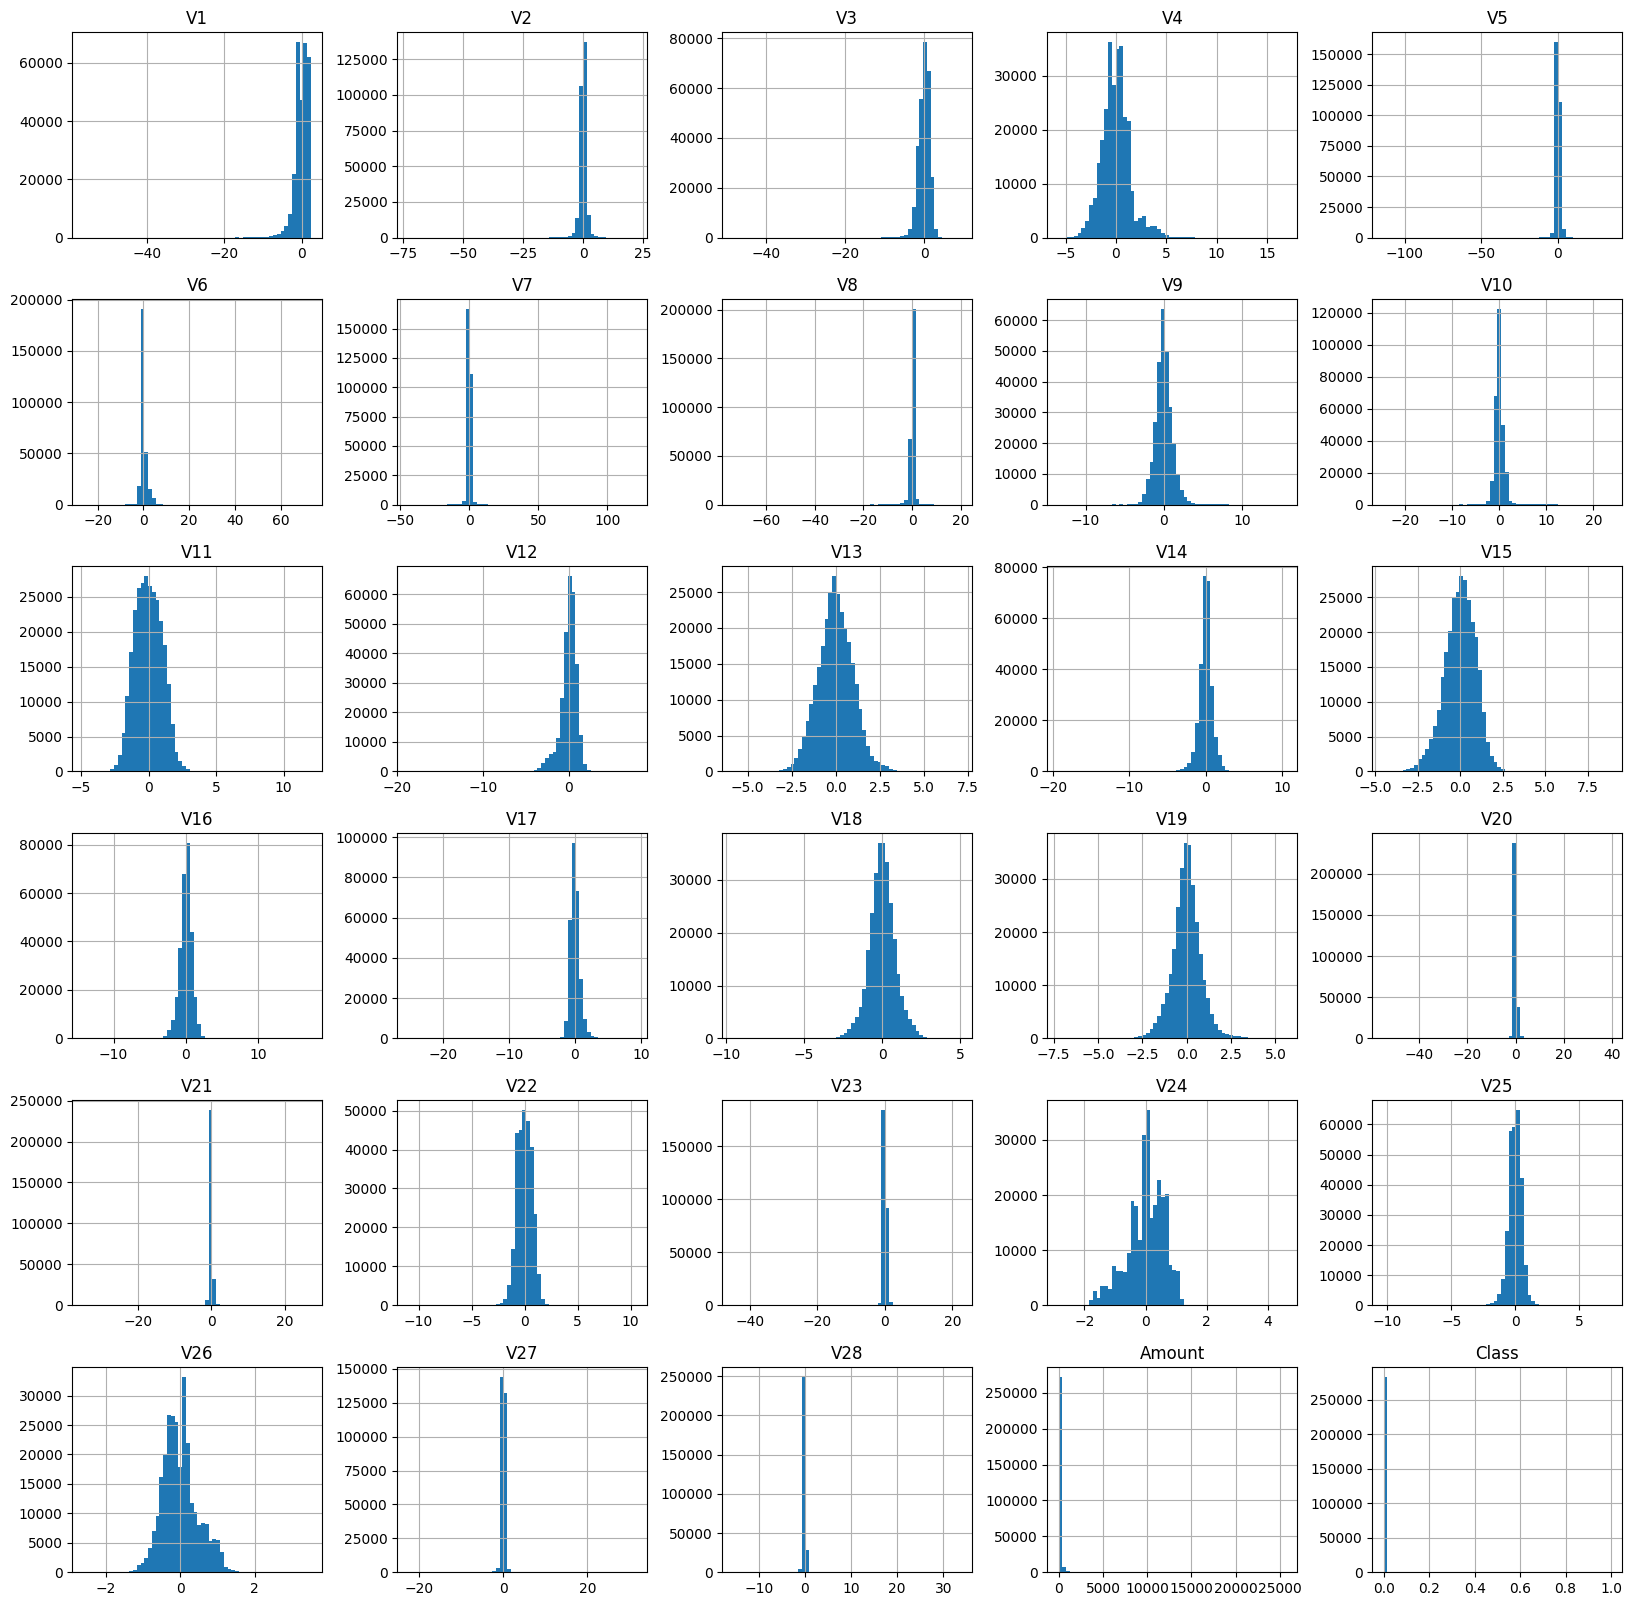

In [14]:
# Plotting a histogram for the different attributes
df.hist(bins = 60, figsize = (20,20))

In [15]:
# Standardizing the Amount attribute
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount']=sc.fit_transform(df['Amount'].values.reshape(-1,1))

In [16]:
# Finding the range of Ammount attribute after standardization
print(min(df['Amount']),max(df['Amount']))

-0.35332684547010107 102.24756383799074


In [17]:
# Splitting the data into dependent and independent variables
X= df.iloc[:,:29]
y= df.iloc[:,29]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
63675,1.196282,0.537631,-0.240309,1.206188,-0.012131,-0.897979,0.118809,-0.034152,-0.173148,-0.364324,...,-0.165470,-0.013189,-0.057484,-0.118661,0.190416,0.624109,-0.341152,0.020824,0.038669,-0.349333
149040,1.924594,0.022872,-1.649046,1.454050,0.527787,-0.613068,0.388976,-0.250003,1.493914,0.084517,...,-0.338165,-0.062388,0.081491,-0.062628,-0.493836,0.376528,-0.524393,-0.064839,-0.077720,-0.140906
77651,-0.463568,2.329468,-2.280806,1.543317,0.554733,-1.671772,0.624371,0.024380,0.527368,-0.055349,...,0.173860,-0.190167,-0.092833,0.228031,0.002621,-0.581126,-0.496793,-0.685003,-0.649358,-0.350252
10075,1.280552,-0.242777,-0.717256,-0.860940,1.731508,3.391249,-0.927235,0.789916,1.531565,-0.487500,...,0.064725,-0.384965,-1.071738,0.112802,0.976432,0.139412,0.763002,-0.090494,0.005312,-0.249732
121485,-0.630513,0.081771,2.035900,-1.002790,-0.249496,0.589125,-0.011769,0.442886,0.489449,-0.968509,...,-0.064621,-0.046211,-0.015282,0.018365,-0.246177,-0.602758,0.777199,0.073565,0.120332,-0.214908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147754,-0.457378,0.507962,-0.350675,-0.423828,1.774481,-0.990110,2.569876,-1.271168,-0.339275,0.315245,...,0.042573,0.146244,1.198265,-0.348979,0.834501,0.782790,0.526101,-0.649903,-0.574900,-0.081760
3221,-1.048560,0.341017,1.879294,-1.953616,0.526567,-1.458813,1.026850,-0.511325,0.969364,-0.943246,...,-0.004021,-0.007423,0.470430,-0.493233,0.605768,0.625685,-0.734803,-0.097161,-0.347476,-0.349333
28284,-0.630707,0.784626,-0.284130,-1.724216,4.112749,2.913828,1.662189,-0.699534,0.590179,0.863280,...,0.432033,-0.369216,-0.274148,-0.506289,0.903450,-0.120051,-0.048071,-1.344943,-1.073321,-0.350292
232650,-2.128185,1.309887,1.873356,-0.016278,-1.693070,0.351486,-1.062957,0.862755,0.173737,1.803635,...,0.215623,-0.282537,0.089028,-0.247944,-0.175410,0.530995,-0.227767,0.825399,0.428481,-0.293422


In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [20]:
print (classification_report (y_test , y_pred))
print("Accuracy of our model is %.2f" % (accuracy*100))
print("F1 Score of our model is %.2f" % (f1*100))
print("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.88      0.65      0.74       113

    accuracy                           1.00     56746
   macro avg       0.94      0.82      0.87     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy of our model is 99.91
F1 Score of our model is 74.49

Confusion matrix:


array([[56623,    10],
       [   40,    73]])

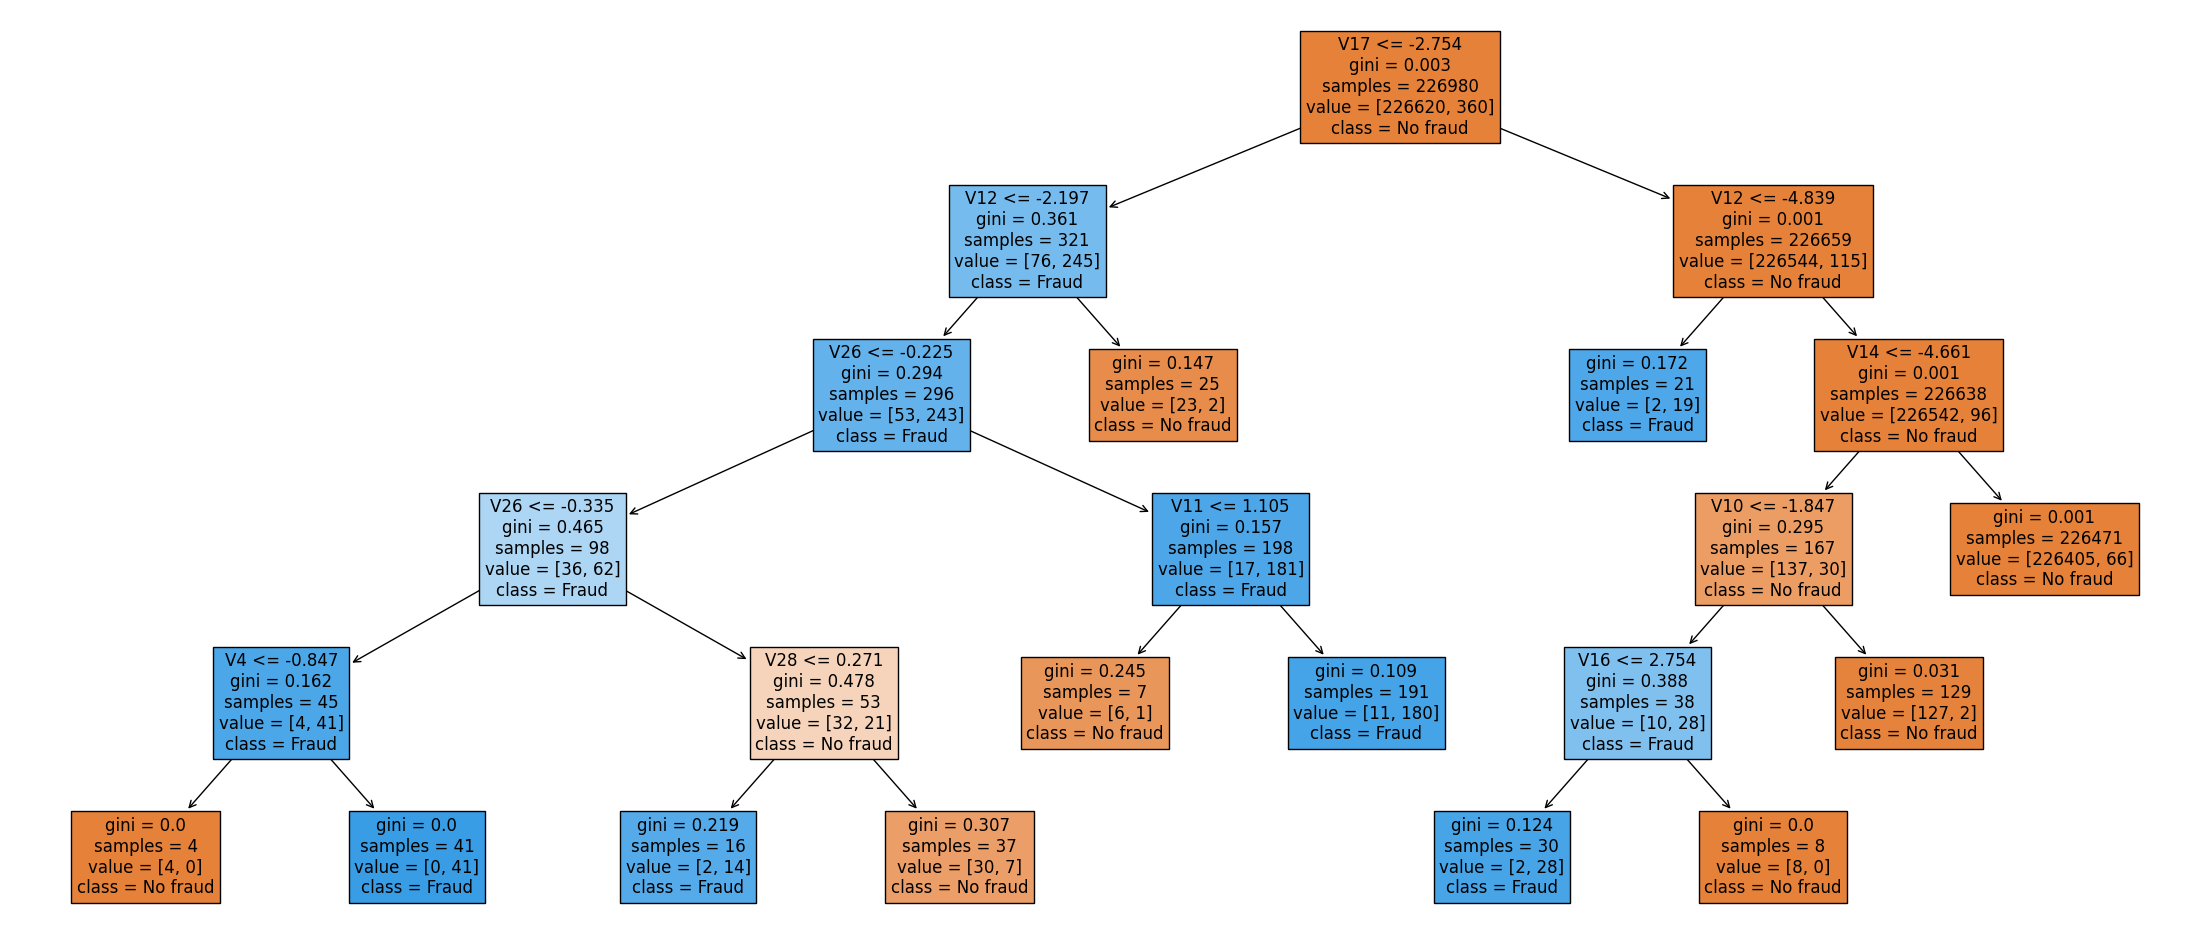

In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.00003)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)
from matplotlib import pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(28,12))
fig = tree.plot_tree(clf,feature_names=X.columns,
                    class_names={0:'No fraud',1:'Fraud'},
                    filled=True,
                    fontsize=12)

In [22]:
print(classification_report (y_test , y_pred))
print("Accuracy of our model is %.2f" % (accuracy*100))
print("F1 Score of our model is %.2f" % (f1*100))
print("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.87      0.83      0.85       113

    accuracy                           1.00     56746
   macro avg       0.94      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy of our model is 99.94
F1 Score of our model is 85.07

Confusion matrix:


array([[56619,    14],
       [   19,    94]])

In [23]:
# KNN
# Finding optimal k value
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
error_rate = []
for i in range(1,10):
 print(i)
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))


1
2
3
4
5
6
7
8
9


Minimum error:- 0.0004229372995453424 at K = 5


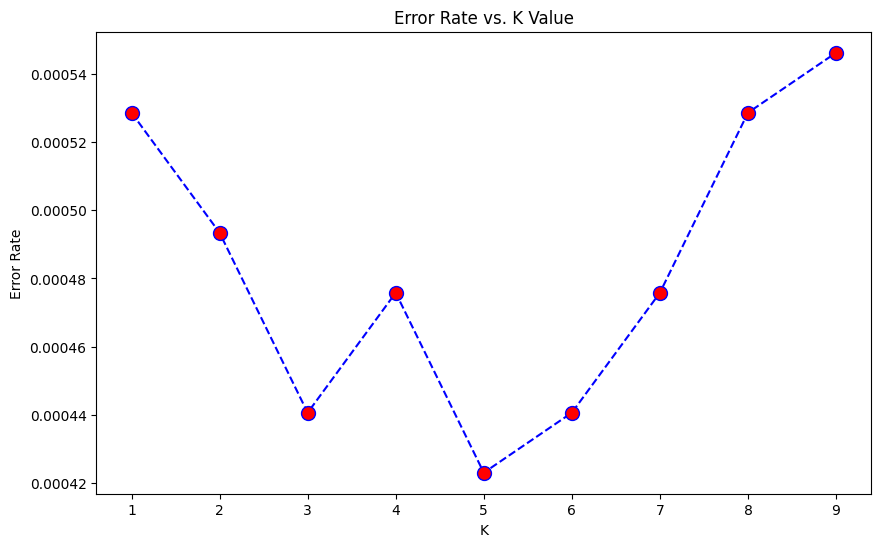

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [25]:
# KNN with k=3
from sklearn.neighbors import KNeighborsClassifier
n = 3
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [26]:
print (classification_report (y_test , y_pred))
print("Accuracy of our model is %.2f" % (accuracy*100))
print("F1 Score of our model is %.2f" % (f1*100))
print("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.95      0.82      0.88       113

    accuracy                           1.00     56746
   macro avg       0.97      0.91      0.94     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy of our model is 99.96
F1 Score of our model is 88.15

Confusion matrix:


array([[56628,     5],
       [   20,    93]])

In [27]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_test = svm.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [28]:
print (classification_report (y_test , y_pred))
print("Accuracy of our model is %.2f" % (accuracy*100))
print("F1 Score of our model is %.2f" % (f1*100))
print("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.85      0.99      0.91        84

    accuracy                           1.00     56746
   macro avg       0.92      0.99      0.96     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy of our model is 99.97
F1 Score of our model is 91.21

Confusion matrix:


array([[56647,    15],
       [    1,    83]])

In [29]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [30]:
print (classification_report (y_test , y_pred))
print("Accuracy of our model is %.2f" % (accuracy*100))
print("F1 Score of our model is %.2f" % (f1*100))
print("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56662
           1       0.06      1.00      0.12        84

    accuracy                           0.98     56746
   macro avg       0.53      0.99      0.55     56746
weighted avg       1.00      0.98      0.99     56746

Accuracy of our model is 97.83
F1 Score of our model is 11.98

Confusion matrix:


array([[55428,  1234],
       [    0,    84]])

In [31]:
# Neural network

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
model = keras.Sequential([
    keras.layers.Dense(30,input_shape=(29,),activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))
y_pred = (model.predict(X_test) > 0.5)
acc1=history.history['accuracy']
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)


Epoch 1/20
444/444 [==============================] - 3s 4ms/step - loss: 0.0293 - accuracy: 0.9747 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 2/20
444/444 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 8.2801e-04 - val_accuracy: 0.9995
Epoch 3/20
444/444 [==============================] - 1s 3ms/step - loss: 8.5845e-04 - accuracy: 0.9994 - val_loss: 5.7544e-04 - val_accuracy: 0.9996
Epoch 4/20
444/444 [==============================] - 1s 3ms/step - loss: 7.1071e-04 - accuracy: 0.9994 - val_loss: 4.8652e-04 - val_accuracy: 0.9996
Epoch 5/20
444/444 [==============================] - 1s 3ms/step - loss: 6.4078e-04 - accuracy: 0.9994 - val_loss: 4.1414e-04 - val_accuracy: 0.9996
Epoch 6/20
444/444 [==============================] - 1s 3ms/step - loss: 6.0439e-04 - accuracy: 0.9994 - val_loss: 4.4204e-04 - val_accuracy: 0.9996
Epoch 7/20
444/444 [==============================] - 1s 3ms/step - loss: 5.8749e-04 - accuracy: 0.9994 - val_lo

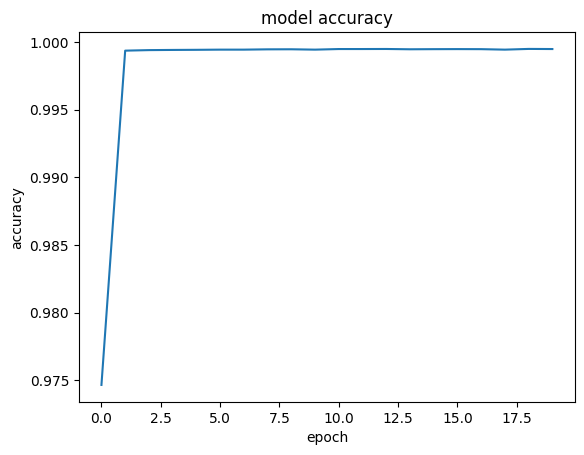

In [32]:
plt.plot(acc1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [33]:
print (classification_report (y_test , y_pred))
print("Accuracy of our model is %.2f" % (accuracy*100))
print("F1 Score of our model is %.2f" % (f1*100))
print("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.80      1.00      0.89        84

    accuracy                           1.00     56746
   macro avg       0.90      1.00      0.94     56746
weighted avg       1.00      1.00      1.00     56746

Accuracy of our model is 99.96
F1 Score of our model is 88.89

Confusion matrix:


array([[56641,    21],
       [    0,    84]])